In [2]:
# линейная регрессия
import pandas as pd                                   # для работы с датафреймом
import numpy as np                                    # для вычислений
import seaborn as sns                                 # для графиков
import matplotlib.pyplot as plt                       # для графиков
import statsmodels.api as sm                          # для статистического анализа
from scipy import stats                               # статистический анализ
from mlxtend.evaluate import permutation_test         # перестановочный тест

from sklearn.model_selection import train_test_split  # для деления на обучающую и тестовую выборки
from sklearn.impute import SimpleImputer              # для заполнения пропусков
from sklearn.preprocessing import OneHotEncoder       # для кодирования категориальных переменных
from sklearn.pipeline import Pipeline                 # для обработки данных для машинного обучения
from sklearn.preprocessing import StandardScaler      # стандартизация данных
from sklearn.compose import ColumnTransformer         # для обработки данных для машинного обучения


In [3]:
# ! pip install pingouin --upgrade

In [4]:
import pingouin as pg               # для статистического анализа

С линейной регрессией мы изучим три подхода:  

1. визуальный
2. статистический
3. машинное обучение

Важно помнить, что всегда предпочтительнее искать самый простой способ решения задачи. Если линейная регрессия будет хорошо справляться,  
то использовать более сложные способы не надо. Если эти сложные способы дадут незначительное улучшение, то не стоит их использовать, если  
это приводит к излишней трате вычислительного времени. Поэтому более сложные методы мы можем использовать, если 1) регрессия к нашей задаче  
не подходит, 2) другой метод не только лучше себя показывает, но и эффективнее.

# Загрузка данных

In [5]:
# загрузка данных и исправление типа данных
db = pd.read_csv('data/books_tidy_data.csv', parse_dates=['publication_date'], dtype={'decade':'object', 'quarter':'object', 'tra_co':'object'})

In [6]:
# удалим признаки, которые не будем рассматривать далее
db = db.drop(['title', 'publication_date', 'authors', 'language_code', 'publisher'], axis=1)

In [7]:
db.head()

,average_rating,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co
0,4.57,652,2095690,27591,2000,3,1
1,4.49,870,2153167,29221,2000,3,1
2,4.42,352,6333,244,2000,4,0
3,4.56,435,2339585,36325,2000,2,1
4,4.78,2690,41428,164,2000,3,1


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      10838 non-null  float64
 1   num_pages           10838 non-null  int64  
 2   ratings_count       10838 non-null  int64  
 3   text_reviews_count  10838 non-null  int64  
 4   decade              10838 non-null  object 
 5   quarter             10838 non-null  object 
 6   tra_co              10838 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 592.8+ KB


In [9]:
# обзор основных характеристик
db.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,10838.000000,10838.000000,1.083800e+04,10838.000000
mean,3.942158,344.175217,1.834788e+04,553.074737
std,0.295387,238.556381,1.138660e+05,2599.330244
min,1.000000,11.000000,0.000000e+00,0.000000
25%,3.770000,203.000000,1.170000e+02,10.000000
50%,3.960000,304.000000,8.035000e+02,49.000000
75%,4.130000,417.000000,5.226750e+03,248.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


# Визуальный подход

<AxesSubplot:xlabel='num_pages', ylabel='average_rating'>

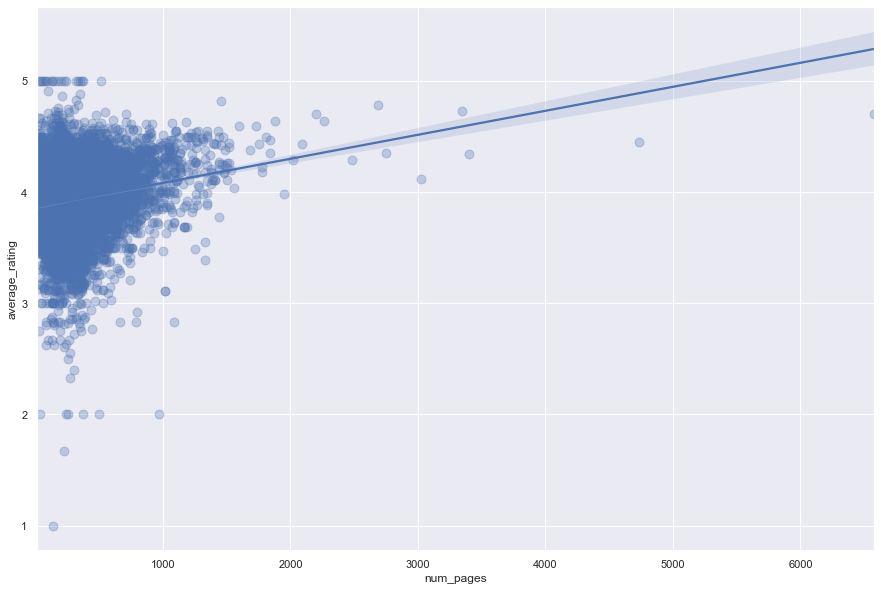

In [10]:
# задаем стиль графика
sns.set_theme(color_codes=True)
# устанавливаем размер графика
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x='num_pages', y='average_rating', data=db, scatter_kws={'s': 80, 'alpha': 0.3})

Интерпретация графика: точка пересечения линии регрессии с осью Y находится в районе 3.9 (в данном случае это не имеет значения, так как в этой точке X принимает значение 0, а книг с таким количеством страниц не бывает). Наклон линии говорит о том, что num_pages оказывает влияние на оценку. Наклон положительный, то есть чем больше страниц, тем выше оценка. 

Рассмотрим дополнительные техники построения графиков линейной регрессии. Начнем с полиномиальной регрессии.

<AxesSubplot:xlabel='num_pages', ylabel='average_rating'>

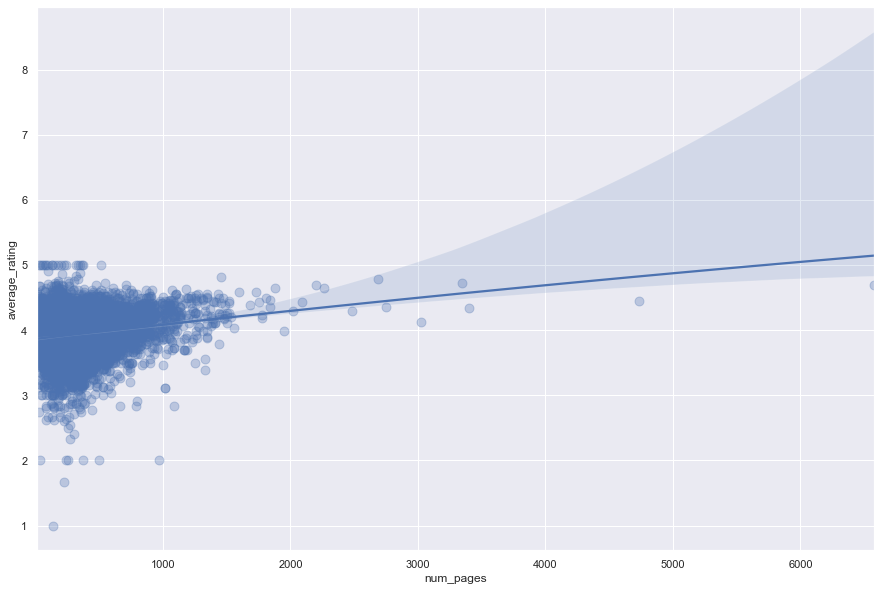

In [11]:
 fig, ax = plt.subplots(figsize=(15,10))
 # полиномиальная регрессия
 sns.regplot(x='num_pages', y='average_rating', data=db, scatter_kws={'s':80, 'alpha':0.3}, order=2)